# Chapter 3 Assignment ---> Classification

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#WownlLoad dataset.

!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2024-09-19 11:47:09--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M   286KB/s    in 5.7s    

2024-09-19 11:47:17 (253 KB/s) - ‘data.csv’ saved [1475504/1475504]



## Loading, EDA, Cleaning.

In [106]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [107]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Cleaning

In [109]:
columns = ['Make', 'Model', 'Year', 'Engine HP',
           'Engine Cylinders', 'Transmission Type',
           'Vehicle Style', 'highway MPG', 'city mpg',
           'MSRP']
df = df[columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In order to make the columns label uniform and their respective values uniform, we will be cleaning this respective labels and values by replacing all spaces with an underscore and converting all cases to lowercase.

In [110]:
# clean all column label.

df.columns = df.columns.str.replace(' ', '_').str.lower()

In [111]:
columns = [c.replace(' ', '_').lower() for c in columns]
columns

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'msrp']

In [112]:
# Using update to overwrite values in DataFrame
#df.update(pd.DataFrame({'A': new_values}))

In [113]:
[df.update(pd.DataFrame({c: (df[c].str.replace(' ', '_').str.lower())})) for c in columns if df.dtypes[c] == 'object']

# This updates each column c, with new values, which are cleaned column that are lowered and space removed.
#df.update(pd.DataFrame({'A': new_values}))

df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [114]:
# fill na

df.fillna(0, inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

## Question 1
What is the most frequent observation (mode) for the column transmission_type?

In [115]:
df.transmission_type.mode()

0    automatic
Name: transmission_type, dtype: object

In [116]:
# Confirmation.
df.transmission_type.value_counts(normalize=True)

transmission_type
automatic           0.693806
manual              0.246349
automated_manual    0.052543
direct_drive        0.005708
unknown             0.001595
Name: proportion, dtype: float64

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [117]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [118]:
df.corr(numeric_only=True).abs()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
year,1.000000,0.338714,0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,0.415707,0.424918,0.650095
engine_cylinders,0.040708,0.774851,1.000000,0.614541,0.587306,0.526274
highway_mpg,0.258240,0.415707,0.614541,1.000000,0.886829,0.160043
city_mpg,0.198171,0.424918,0.587306,0.886829,1.000000,0.157676
msrp,0.227590,0.650095,0.526274,0.160043,0.157676,1.000000


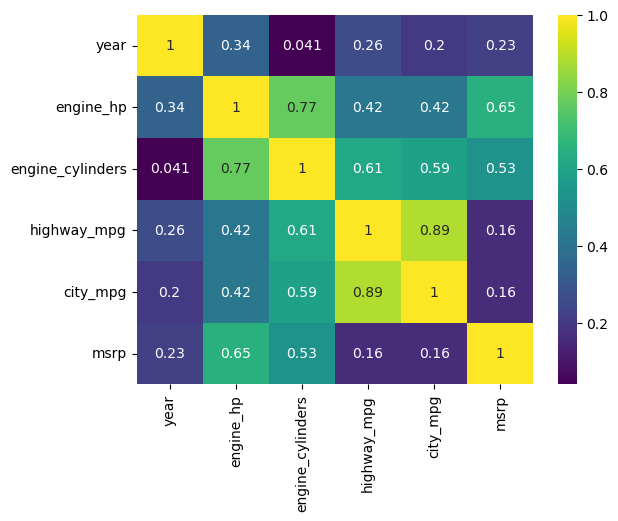

In [119]:
sns.heatmap(df.corr(numeric_only=True).abs(), cmap='viridis', annot=True);

## Make price binary
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [120]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [121]:
df['above_average'] = (df.msrp > df.msrp.mean()).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


In [122]:
del df['msrp']

In [123]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


## Split the data
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (above_average) is not in your dataframe.

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,1


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

assert len(df_train) + len(df_test) + len(df_val) == len(df)

In [127]:
#Extract the labels.

y_train = df_train.above_average
y_test = df_test.above_average
y_val = df_val.above_average

del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

## Question 3
Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2)

In [128]:
from sklearn.metrics import mutual_info_score

In [129]:
def mutual_info_score_above_average(series):
    return mutual_info_score(series, y_train)

In [130]:
categorical_cols = [c for c in df_train.columns if df_train.dtypes[c] == 'object']
categorical_cols

['make', 'model', 'transmission_type', 'vehicle_style']

In [131]:
df_train[categorical_cols].apply(mutual_info_score_above_average).sort_values(ascending=False).round(2)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

## Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [153]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [148]:
dv = DictVectorizer(sparse=False)
dv.fit(df_train.to_dict(orient='records'))

def prepare_df_to_X(df_):
    X = dv.transform(df_.to_dict(orient='records'))
    return dv, X

# dv = DictVectorizer(sparse=False)
# X_train = dv.fit_transform(df_train.to_dict(orient='records'))

#dv.get_feature_names_out()

dv, X_train = prepare_df_to_X(df_train)
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [149]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [150]:
_, X_val = prepare_df_to_X(df_val)
X_val

array([[2.300e+01, 4.000e+00, 2.100e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.700e+01, 6.000e+00, 3.540e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [2.200e+01, 4.000e+00, 1.400e+02, ..., 1.000e+00, 0.000e+00,
        2.005e+03],
       ...,
       [1.200e+01, 6.000e+00, 1.900e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.400e+01, 8.000e+00, 4.300e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.800e+01, 6.000e+00, 3.210e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [155]:
y_pred = model.predict(X_val)

In [162]:
default_accuracy = accuracy_score(y_pred, y_val)

In [160]:
round(accuracy_score(y_pred, y_val), 2)

0.94

## Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?

year
engine_hp
transmission_type
city_mpg

In [173]:
def train(feature_to_eliminate, y_train, y_val, default_score):
    
    df_train_copy = df_train.copy()
    del df_train_copy[feature_to_eliminate]
    
    df_val_copy = df_val.copy()
    del df_val_copy[feature_to_eliminate]
    
    X_train = dv.transform(df_train_copy.to_dict(orient='records'))
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    X_val = dv.transform(df_val_copy.to_dict(orient='records'))
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_pred, y_val)
    score_diff = abs(default_score - score)
    
    return score_diff

In [174]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
score_diffs = []

for feat in features:
    score_diff = train(feat, y_train, y_val, default_accuracy)
    print(score_diff)
    score_diffs.append(score_diff)

0.00923206042803193
0.015107007973143127
0.005874947545111198
0.007133864876206486


In [176]:
features_dict = dict(zip(features, score_diffs))
features_dict

{'year': 0.00923206042803193,
 'engine_hp': 0.015107007973143127,
 'transmission_type': 0.005874947545111198,
 'city_mpg': 0.007133864876206486}

In [179]:
sorted(features_dict.items(), key=lambda x: x[1])

[('transmission_type', 0.005874947545111198),
 ('city_mpg', 0.007133864876206486),
 ('year', 0.00923206042803193),
 ('engine_hp', 0.015107007973143127)]

## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

In [180]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [195]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

In [188]:
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [189]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
columns = [c.replace(' ', '_').lower() for c in df.columns]
[df.update(pd.DataFrame({c: (df[c].str.replace(' ', '_').str.lower())})) for c in columns if df.dtypes[c] == 'object']

# fill na

df.fillna(0, inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [190]:
df['log_msrp'] = np.log1p(df['msrp'])
df['log_msrp']

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: log_msrp, Length: 11914, dtype: float64

In [197]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
    
#Extract the labels.
    
y_train = df_train.log_msrp
y_test = df_test.log_msrp
y_val = df_val.log_msrp
    
del df_train['log_msrp']
del df_test['log_msrp']
del df_val['log_msrp']
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']
    
    
assert len(df_train) + len(df_test) + len(df_val) == len(df)    

In [202]:
def train_linear(y_train, y_val, r):
    
    df_train_copy = df_train.copy()
    # del df_train_copy[feature_to_eliminate]
    df_val_copy = df_val.copy()
  
    X_train = dv.transform(df_train_copy.to_dict(orient='records'))
    model = Ridge(solver='sag', random_state=42, alpha=r, max_iter=1000)
    model.fit(X_train, y_train)
    
    X_val = dv.transform(df_val.to_dict(orient='records'))
    y_pred = model.predict(X_val)
    
    score = root_mean_squared_error(y_pred, y_val)
    
    return score

Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
Round your RMSE scores to 3 decimal digits.

In [203]:
scores = []
regularization = [0, 0.01, 0.1, 1, 10]

for r in regularization:
    score = train_linear(y_train, y_val, r)
    scores.append(score)

/home/deelight/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/deelight/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/deelight/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/deelight/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/deelight/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [206]:
dict(zip(regularization, [round(score, 3) for score in scores]))

{0: 0.487, 0.01: 0.487, 0.1: 0.487, 1: 0.487, 10: 0.487}